<a href="https://colab.research.google.com/github/yramin/io19/blob/master/Zero%20to%20Hero/Rock-Paper-Scissors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps.zip \
    -O /tmp/rps.zip
  
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps-test-set.zip \
    -O /tmp/rps-test-set.zip

--2021-01-08 04:49:17--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.142.128, 74.125.20.128, 74.125.195.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.142.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 200682221 (191M) [application/zip]
Saving to: ‘/tmp/rps.zip’

/tmp/rps.zip        100%[===================>] 191.38M  82.9MB/s    in 2.3s    

2021-01-08 04:49:20 (82.9 MB/s) - ‘/tmp/rps.zip’ saved [200682221/200682221]

--2021-01-08 04:49:20--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps-test-set.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.20.128, 74.125.195.128, 74.125.142.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.20.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29516758 (28M) [application/zip]
Saving to: ‘/tmp/r

In [3]:
import os
import zipfile

local_zip = '/tmp/rps.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/')
zip_ref.close()

local_zip = '/tmp/rps-test-set.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/')
zip_ref.close()

In [4]:
rock_dir = os.path.join('/tmp/rps/rock')
paper_dir = os.path.join('/tmp/rps/paper')
scissors_dir = os.path.join('/tmp/rps/scissors')

print('total training rock images:', len(os.listdir(rock_dir)))
print('total training paper images:', len(os.listdir(paper_dir)))
print('total training scissors images:', len(os.listdir(scissors_dir)))

rock_files = os.listdir(rock_dir)
print(rock_files[:10])

paper_files = os.listdir(paper_dir)
print(paper_files[:10])

scissors_files = os.listdir(scissors_dir)
print(scissors_files[:10])

total training rock images: 840
total training paper images: 840
total training scissors images: 840
['rock01-067.png', 'rock07-k03-003.png', 'rock05ck01-103.png', 'rock01-057.png', 'rock04-091.png', 'rock04-101.png', 'rock06ck02-117.png', 'rock07-k03-106.png', 'rock05ck01-027.png', 'rock04-066.png']
['paper04-006.png', 'paper01-035.png', 'paper05-095.png', 'paper02-005.png', 'paper07-019.png', 'paper07-000.png', 'paper06-113.png', 'paper02-097.png', 'paper07-103.png', 'paper05-102.png']
['testscissors02-037.png', 'scissors02-020.png', 'scissors01-090.png', 'scissors03-009.png', 'scissors04-065.png', 'scissors03-103.png', 'scissors03-093.png', 'testscissors01-071.png', 'scissors04-023.png', 'scissors02-091.png']


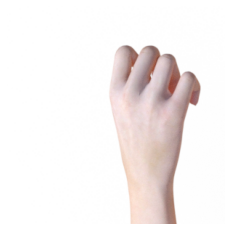

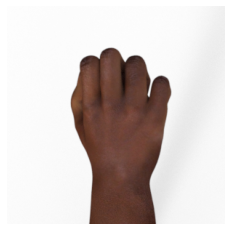

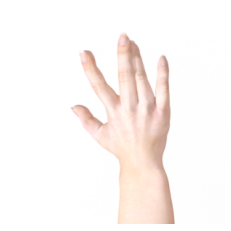

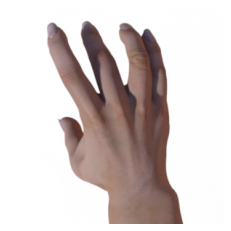

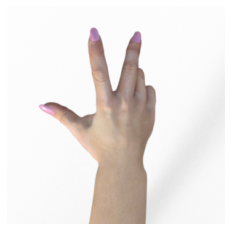

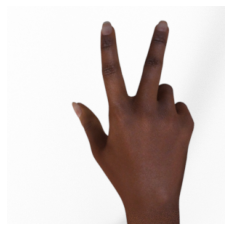

In [5]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

pic_index = 2

next_rock = [os.path.join(rock_dir, fname) 
                for fname in rock_files[pic_index-2:pic_index]]
next_paper = [os.path.join(paper_dir, fname) 
                for fname in paper_files[pic_index-2:pic_index]]
next_scissors = [os.path.join(scissors_dir, fname) 
                for fname in scissors_files[pic_index-2:pic_index]]

for i, img_path in enumerate(next_rock+next_paper+next_scissors):
  #print(img_path)
  img = mpimg.imread(img_path)
  plt.imshow(img)
  plt.axis('Off')
  plt.show()

In [6]:
import tensorflow as tf
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator

TRAINING_DIR = "/tmp/rps/"
training_datagen = ImageDataGenerator(
      rescale = 1./255,
	  rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

VALIDATION_DIR = "/tmp/rps-test-set/"
validation_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = training_datagen.flow_from_directory(
	TRAINING_DIR,
	target_size=(150,150),
	class_mode='categorical'
)

validation_generator = validation_datagen.flow_from_directory(
	VALIDATION_DIR,
	target_size=(150,150),
	class_mode='categorical'
)

model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])


model.summary()

model.compile(loss = 'categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

history = model.fit_generator(train_generator, epochs=25, validation_data = validation_generator, verbose = 1)

model.save("rps.h5")


Found 2520 images belonging to 3 classes.
Found 372 images belonging to 3 classes.
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_______________________________________

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/25
79/79 [==============================] - 171s 2s/step - loss: 1.7973 - accuracy: 0.3272 - val_loss: 1.1238 - val_accuracy: 0.3790
Epoch 2/25
79/79 [==============================] - 169s 2s/step - loss: 1.0313 - accuracy: 0.4910 - val_loss: 0.4963 - val_accuracy: 0.7661
Epoch 3/25
79/79 [==============================] - 169s 2s/step - loss: 0.6484 - accuracy: 0.6903 - val_loss: 0.1094 - val_accuracy: 0.9731
Epoch 4/25
79/79 [==============================] - 168s 2s/step - loss: 0.4533 - accuracy: 0.8036 - val_loss: 0.1009 - val_accuracy: 0.9624
Epoch 5/25
79/79 [==============================] - 170s 2s/step - loss: 0.2879 - accuracy: 0.8933 - val_loss: 0.1079 - val_accuracy: 0.9651
Epoch 6/25
79/79 [==============================] - 165s 2s/step - loss: 0.2514 - accuracy: 0.9046 - val_loss: 0.0410 - val_accuracy: 0.9731
Epoch 7/25
79/79 [==============================] - 165s 2s/step - loss: 0.1924 - accuracy: 0.9269 - val_loss: 0.0806 - val_accuracy: 0.9489
Epoch 8/25
79

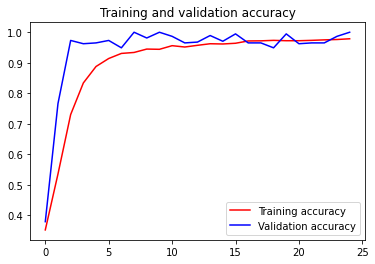

<Figure size 432x288 with 0 Axes>

In [13]:
import matplotlib.pyplot as plt
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(accuracy))

plt.plot(epochs, accuracy, 'r', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150, 150))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(fn)
  print(classes)

Saving paper2.png to paper2 (1).png
Saving rock-hires2.png to rock-hires2.png
Saving scissors-hires2.png to scissors-hires2.png
Saving paper-hires2.png to paper-hires2.png
Saving paper-hires1.png to paper-hires1.png
Saving rock-hires1.png to rock-hires1 (1).png
Saving scissors-hires1.png to scissors-hires1.png
Saving scissors9.png to scissors9.png
Saving scissors8.png to scissors8.png
Saving scissors7.png to scissors7 (1).png
Saving rock9.png to rock9.png
Saving rock8.png to rock8.png
Saving rock7.png to rock7.png
Saving paper9.png to paper9.png
Saving paper8.png to paper8.png
Saving paper7.png to paper7.png
Saving scissors6.png to scissors6.png
Saving scissors5.png to scissors5.png
Saving scissors4.png to scissors4.png
Saving paper6.png to paper6.png
Saving paper5.png to paper5.png
Saving paper4.png to paper4.png
Saving rock6.png to rock6.png
Saving rock5.png to rock5.png
Saving rock4.png to rock4.png
Saving scissors3.png to scissors3.png
Saving scissors2.png to scissors2.png
Saving s